In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from keras.utils import plot_model

In [2]:
train_data = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True)
validation_data = tfds.load('cats_vs_dogs', split='train[80%:90%]', as_supervised=True)
test_data = tfds.load('cats_vs_dogs', split='train[-10%:]', as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteI3MY3I/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
def augmentimages(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/255)
  image = tf.image.resize(image,(300,300))
  return image, label

augmented_training_data = train_data.map(augmentimages)
train_batches = augmented_training_data.shuffle(1024).batch(32)

In [22]:
model = Sequential()
model.add(Conv2D(16,input_shape=(300,300,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(2,activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=tf.keras.optimizers.RMSprop(lr=0.001))
model.fit(train_batches,epochs=25)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 128)      

In [23]:
print(model.layers[-3].name)
print(model.layers[-1].name)

conv2d_11
dense_2


In [24]:
model.save('catsdogscam.h5')

In [25]:
from keras.models import Model
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 64)       

In [26]:
!wget -O cat1.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat1.jpg
!wget -O cat2.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat2.jpg
!wget -O catanddog.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/catanddog.jpg
!wget -O dog1.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/dog1.jpg
!wget -O dog2.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/dog2.jpg

--2020-10-07 18:59:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat1.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414826 (405K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 405.10K  --.-KB/s    in 0.003s  

2020-10-07 18:59:32 (124 MB/s) - ‘cat1.jpg’ saved [414826/414826]

--2020-10-07 18:59:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat2.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 74.125.203.128, 64.233.187.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 599639 (586K) [image/jpeg]
Saving to: ‘cat2.jpg’


tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.77688897 0.22311102]], shape=(1, 2), dtype=float32)


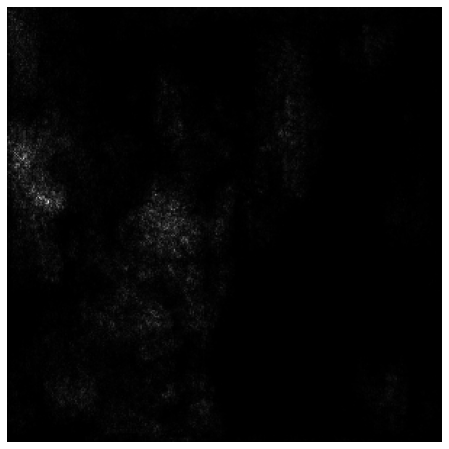

tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.9988733  0.00112664]], shape=(1, 2), dtype=float32)


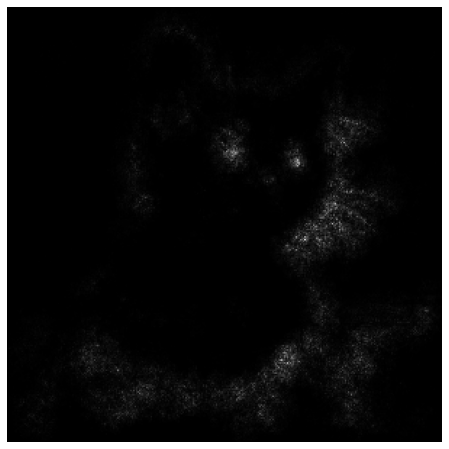

tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.53895307 0.46104693]], shape=(1, 2), dtype=float32)


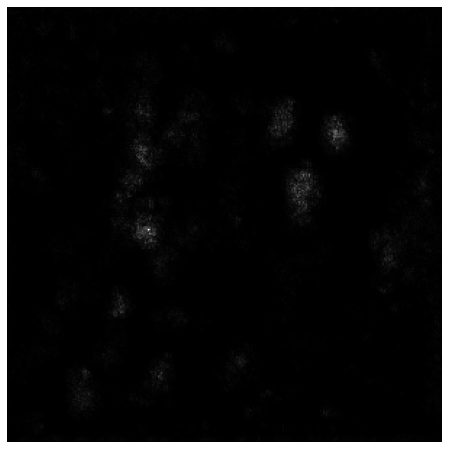

tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.6249062 0.3750938]], shape=(1, 2), dtype=float32)


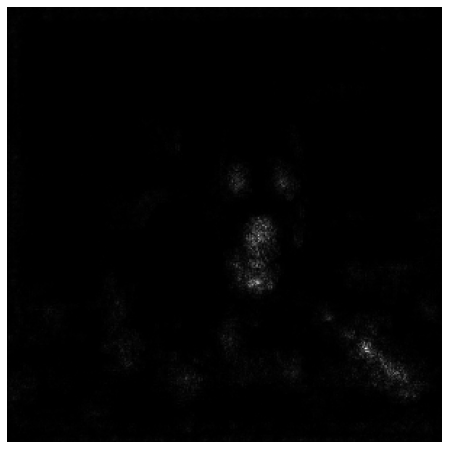

tf.Tensor([[1. 0.]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.99805886 0.00194107]], shape=(1, 2), dtype=float32)


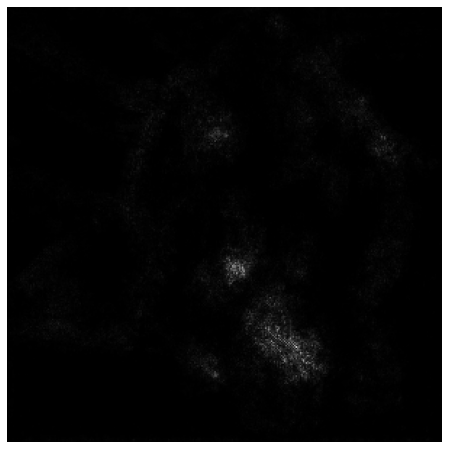

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def do_salience(image):
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  img = cv2.resize(img, (300, 300)) / 255.0
  images = np.expand_dims(img, axis=0)
  class_index = 0   
  num_classes = 2
  expected_output = tf.one_hot([class_index] * images.shape[0], num_classes)
  print(expected_output)
  with tf.GradientTape() as tape:
    inputs = tf.cast(images, tf.float32)
    tape.watch(inputs)
    predictions = model(inputs)
    print(predictions)
    loss = tf.keras.losses.categorical_crossentropy(
        expected_output, predictions
    )
    gradients = tape.gradient(loss, inputs)
    grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis=-1)
    normalized_tensor = tf.cast(255 * (grayscale_tensor - tf.reduce_min(grayscale_tensor)) / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)), tf.uint8,)
    normalized_tensor = tf.squeeze(normalized_tensor)
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(normalized_tensor, cmap='gray')
    plt.show()
    salient_image_name = "salient" + image


    #normalized_tensor = tf.cast(normalized_tensor, tf.uint8)
    normalized_tensor = tf.expand_dims(normalized_tensor, -1)
    normalized_tensor = tf.io.encode_jpeg(normalized_tensor, quality=100, format='grayscale')
    writer = tf.io.write_file(salient_image_name, normalized_tensor)

do_salience('cat1.jpg')
do_salience('cat2.jpg')
do_salience('catanddog.jpg')
do_salience('dog1.jpg')
do_salience('dog2.jpg')